## Домашнее задание № 17
### Козел А.Г. v.1 

### Задача 1
1. Из небольшого объема исходных изображений (картинок) с использованием алгоритмов кластеризации найти похожие. 
2. В выводах обосновать какие метрики и алгоритмы лучше использовать для решения вышеизложенных задач.

### Задача 2
1. Из текстуальных данных с использованием алгоритмов кластеризации найти похожие. 
2. В выводах обосновать какие метрики и алгоритмы лучше использовать для решения вышеизложенных задач.

### Задача 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image, ImageFilter
import os
import cv2
import random

import tensorflow as tf
import tensorflow_hub as hub

import cv2
import os
import glob
from PIL import  Image,ImageFilter

In [2]:
images = [Image.open(file) for file in glob.glob(r"C:\Users\37533\Desktop\jupyter\ДЗ 17\0\*.png")]
len(images)

200

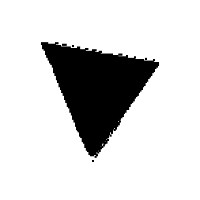

In [3]:
#по 50 изображений фигур
images[0]

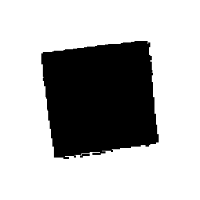

In [4]:
images[50]         

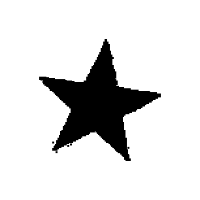

In [5]:
images[100]

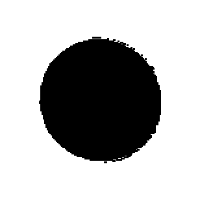

In [6]:
images[150]

In [7]:
os.listdir('C:\\Users\\37533\\Desktop\\jupyter\\ДЗ 17\\0')

['1213.png',
 '1214.png',
 '1215.png',
 '1216.png',
 '1217.png',
 '1218.png',
 '1219.png',
 '122.png',
 '1220.png',
 '1221.png',
 '1222.png',
 '1223.png',
 '1224.png',
 '1225.png',
 '1226.png',
 '1227.png',
 '1228.png',
 '1229.png',
 '123.png',
 '1230.png',
 '1231.png',
 '1232.png',
 '1233.png',
 '1234.png',
 '1235.png',
 '1236.png',
 '1237.png',
 '1238.png',
 '1239.png',
 '124.png',
 '1240.png',
 '1241.png',
 '1242.png',
 '1243.png',
 '1244.png',
 '1245.png',
 '1246.png',
 '1247.png',
 '1248.png',
 '1249.png',
 '125.png',
 '1250.png',
 '1251.png',
 '1252.png',
 '1253.png',
 '1254.png',
 '1255.png',
 '1256.png',
 '1257.png',
 '1258.png',
 '1279.png',
 '128.png',
 '1280.png',
 '1281.png',
 '1282.png',
 '1283.png',
 '1284.png',
 '1285.png',
 '1286.png',
 '1287.png',
 '1288.png',
 '1289.png',
 '129.png',
 '1290.png',
 '1291.png',
 '1292.png',
 '1293.png',
 '1294.png',
 '1295.png',
 '1296.png',
 '1297.png',
 '1298.png',
 '1299.png',
 '13.png',
 '130.png',
 '1300.png',
 '1301.png',
 '1302.p

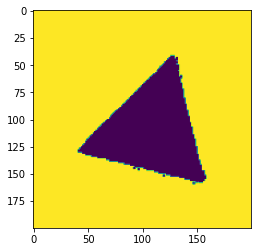

In [8]:
import matplotlib.pyplot as plt
from matplotlib import image
im=image.imread('C:\\Users\\37533\\Desktop\\jupyter\\ДЗ 17\\0\\1250.png')
plt.imshow(im)

In [ ]:
X_tsne = TSNE(n_components=2, init='pca', random_state=0).fit_transform(X)
X_tsne.shape

Дальше эту задачу не доделала, буду позже опять доделывать..

### Задача 2
1. Из текстуальных данных с использованием алгоритмов кластеризации найти похожие.
2. В выводах обосновать какие метрики и алгоритмы лучше использовать для решения вышеизложенных задач.

In [28]:
# Загрузка требуемых библиотек
import re
import string
from collections import Counter
import spacy 
from spacy.lang.ru.stop_words import STOP_WORDS
nlp = spacy.load("ru_core_news_sm")

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from string import punctuation
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

In [11]:
with open('The little Prince.txt', encoding="utf8") as f:
    text = f.read()

### Загрузка текста. Чистка данных. Лемматизация

In [12]:
book_result = re.sub(r'\d+', '', text)
doc = nlp(book_result)
# Лемматизация и конвертация токенов в нижний регистр
text_lemm = [ word.lemma_.lower().strip()
             if word.lemma_ != "-PRON-" 
             else word.lower_ for word in doc]
punctuations = string.punctuation + '–' + '...' # к списку пунктуации добавляю тире
#цикл проверяет не является ли слово в документе стоп-словом или знаком пунктуации
text_result = [word for word in text_lemm
               if word not in STOP_WORDS 
               and word not in punctuations]

count_words = Counter(text_result)
    
print('Количество слов в тексте: ' '{}.'.format(len(text_result)))
print('Количество уникальных слов в тексте: ' '{}.\n'.format(len(count_words)))

Количество слов в тексте: 5675.
Количество уникальных слов в тексте: 2015.



In [13]:
count_words.most_common(5)

[('маленький', 201),
 ('принц', 182),
 ('сказать', 138),
 ('планета', 64),
 ('человек', 51)]

### Облако слов - позволяет описать одной картинкой текст

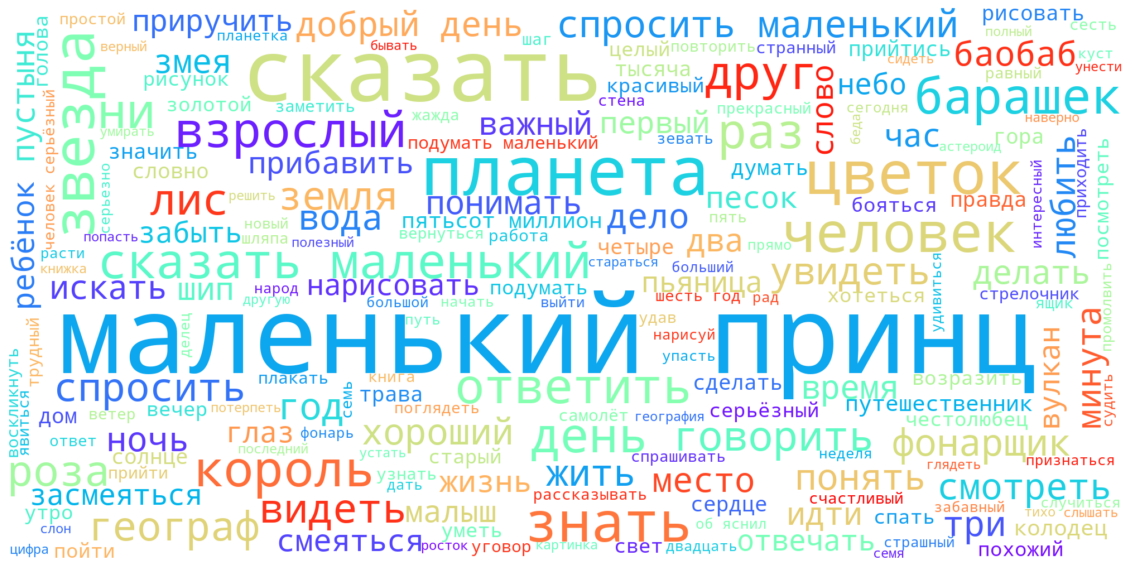

In [14]:
text = ','.join([word for word in text_result])
wordcloud = WordCloud(height=1000, width=2000, background_color='white', colormap='rainbow_r').generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Векторное представление

In [15]:
df_words = pd.DataFrame.from_dict(count_words, 
                            orient='index').reset_index()
df_words = df_words.rename(columns={'index':'Word', 0:'Count'})
df_words.sort_values(by=['Count'], inplace=True, ascending=False)
df_words

,Word,Count
3,маленький,201
4,принц,182
14,сказать,138
324,планета,64
131,человек,51
...,...,...
957,простудить,1
956,оставь,1
953,застынуть,1
952,упрёк,1


In [16]:
def get_word_vectors(words):
    '''
    Функция конвертирует список слов в их векторное представление
    '''
    ar = []
    for i in words:
        ar.append(nlp(i).vector)
    return ar

word_vector_list = get_word_vectors(df_words['Word'])

In [17]:
df_vec = pd.DataFrame(word_vector_list)
df_vect = df_vec.T
df_vect.columns = df_words['Word']
df_vect.shape

(96, 2015)

In [18]:
df_vect

Word,маленький,принц,сказать,планета,человек,звезда,цветок,день,знать,спросить,...,стерпеть,насекомое,звери,свежесть,ночной,простудить,оставь,застынуть,упрёк,незнакомую
0,1.983454,0.223304,-0.042598,0.514755,-0.547444,0.800483,0.033986,1.375983,-0.220126,-1.117804,...,-0.738115,-0.383257,0.348685,-0.876716,-0.540452,-0.614511,1.930830,-0.185801,0.458761,0.772076
1,-0.350970,-1.431302,0.773802,-1.044126,-1.166893,-0.525448,-1.207916,-0.934916,0.981623,0.759621,...,0.590149,-2.693326,-0.813660,-0.187111,0.540285,0.093165,-0.903637,0.788590,-1.092366,-0.786313
2,0.131774,-1.149301,-0.558557,-0.581368,-1.178349,-0.834336,-0.494003,0.557889,-1.067184,-0.884222,...,-0.778082,0.374124,0.027428,-1.395299,-1.605734,0.193390,-1.077823,-0.766020,0.239874,1.218351
3,-0.290848,3.401230,-0.126502,0.325959,1.455469,3.399232,0.579362,-1.476325,1.233047,0.217647,...,0.536007,1.202864,1.700955,1.347185,-0.520248,-0.852096,0.328667,-0.713571,0.549357,-0.660731
4,1.717791,-0.339627,0.129836,-0.566394,-0.435362,0.119510,0.623551,0.677257,0.510522,0.221487,...,-0.296387,0.597104,-0.244901,-0.706036,0.615457,-0.061791,0.366244,-0.187111,0.196186,1.838643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,-0.527320,-1.302804,0.092883,-0.154497,-1.138098,-0.960310,2.041208,1.064506,0.084189,-0.591107,...,0.492350,1.438472,-1.190221,-0.307921,0.787774,-0.201547,0.218601,-0.090160,0.763380,0.215285
92,0.975098,1.393747,-0.694327,-0.787038,1.625776,-1.028633,1.719567,0.513164,-0.261618,-1.284456,...,-0.764060,1.700134,-0.010241,-1.325031,-0.540111,-1.093649,-0.602340,-0.701584,0.017539,0.109146
93,-0.519604,-0.878613,-0.299485,-0.348279,-1.536208,-1.299933,-1.116757,-1.599505,0.451001,0.196202,...,-0.521156,0.308438,0.378596,-1.535404,-1.059334,-0.067309,-0.051980,-1.320883,0.032803,-1.130501
94,0.122501,0.996131,0.108057,-0.221815,0.921649,0.027860,-0.553891,0.957954,-0.076712,0.087751,...,0.096021,-1.440393,-0.606188,-0.328164,0.068382,0.317653,0.726768,0.598544,-0.109102,0.906642


Text(0, 0.5, 'Совокупная объясненная дисперсия')

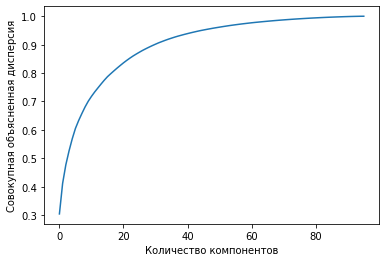

In [19]:
pca = PCA().fit(word_vector_list)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Количество компонентов')
plt.ylabel('Совокупная объясненная дисперсия')


Text(0, 0.5, 'Совокупная объясненная дисперсия')

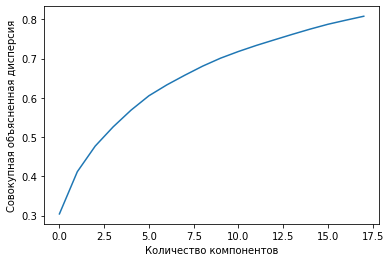

In [20]:
pca = PCA(0.8).fit(word_vector_list)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Количество компонентов')
plt.ylabel('Совокупная объясненная дисперсия')

In [24]:
word_vecs_2d = pca.fit_transform(get_word_vectors(df_vect))
word_vecs_2d = pd.DataFrame(word_vecs_2d, index=df_vect.columns)
word_vecs_2d.T


Word,маленький,принц,сказать,планета,человек,звезда,цветок,день,знать,спросить,...,стерпеть,насекомое,звери,свежесть,ночной,простудить,оставь,застынуть,упрёк,незнакомую
0,-6.007712,-6.175686,7.822371,-4.893946,-5.746344,-4.911771,-5.187355,-5.620781,7.696650,8.541214,...,7.453700,-3.977306,-4.518606,-3.305275,-3.237826,6.924796,-3.157927,6.173127,-3.652162,-2.166946
1,6.435991,0.859830,0.042328,-3.660900,0.529136,-2.367253,-2.217469,-2.407449,-2.076273,0.104550,...,-0.762979,-0.807038,-2.423791,-4.343801,5.828615,0.724968,-1.641790,0.331658,-3.019322,1.337495
2,-1.287079,-1.644737,-2.304851,0.667377,-1.758650,-0.475296,-2.568296,-0.948074,-1.857634,-2.317988,...,-1.436642,2.331977,0.865134,-1.042604,-0.789170,-2.654992,-1.422736,-3.109266,-1.124624,1.378051
3,0.381643,0.659592,1.253150,0.445212,-0.252223,0.607521,-0.511187,0.247999,0.128428,0.905529,...,-0.168234,-4.790417,-0.358283,-0.975531,1.296927,1.407024,3.613800,1.609640,-1.113502,0.885649
4,-1.006822,2.413954,-0.325565,4.250197,1.950971,6.702169,-1.045040,-1.665672,-0.841618,0.211265,...,0.178949,-1.675080,2.351163,2.524436,-0.948095,-0.210960,1.428799,-0.287495,-1.450416,-1.691256
5,-1.624508,1.917292,-0.039982,-0.740282,0.373658,-1.169427,2.957797,3.084076,-0.371348,-0.735765,...,0.285409,-1.741371,-1.297982,-2.383856,-1.998954,-0.215289,2.445358,0.374636,-1.716420,-3.155513
6,1.544652,4.860497,-1.809323,-0.698754,3.452181,2.065163,0.731630,-2.675629,1.587872,-0.979761,...,-0.305873,3.974404,1.999243,-1.746545,0.583741,-2.613069,-1.026438,-2.273431,-3.242215,-0.535444
7,-2.244804,-0.999235,0.451026,-0.323321,-1.393037,-1.124492,-1.386958,-1.905910,-0.909746,0.536321,...,-0.005477,-1.871881,0.259331,1.429891,0.945850,1.005710,2.064646,1.671126,1.825018,2.924608
8,-0.285086,5.281961,0.810547,-0.066029,3.694536,2.194808,-2.823220,-2.566580,-0.440387,0.508678,...,0.803314,0.268030,0.739079,-0.210579,-3.943080,0.458435,-0.530243,1.727991,-3.203626,-0.885040
9,-1.532439,0.879279,0.304222,-0.295199,1.582443,-0.152942,1.873174,-0.953837,0.162775,0.394878,...,0.367821,2.511720,3.098266,-1.361702,2.759531,0.303849,0.333024,1.726148,0.344866,2.635724


In [25]:
words = df_words['Word'][:]

# Задаем 2 измерения
pca = PCA(n_components=2)
pca.fit(get_word_vectors(words))
word_vecs_2d = pca.transform(get_word_vectors(words))




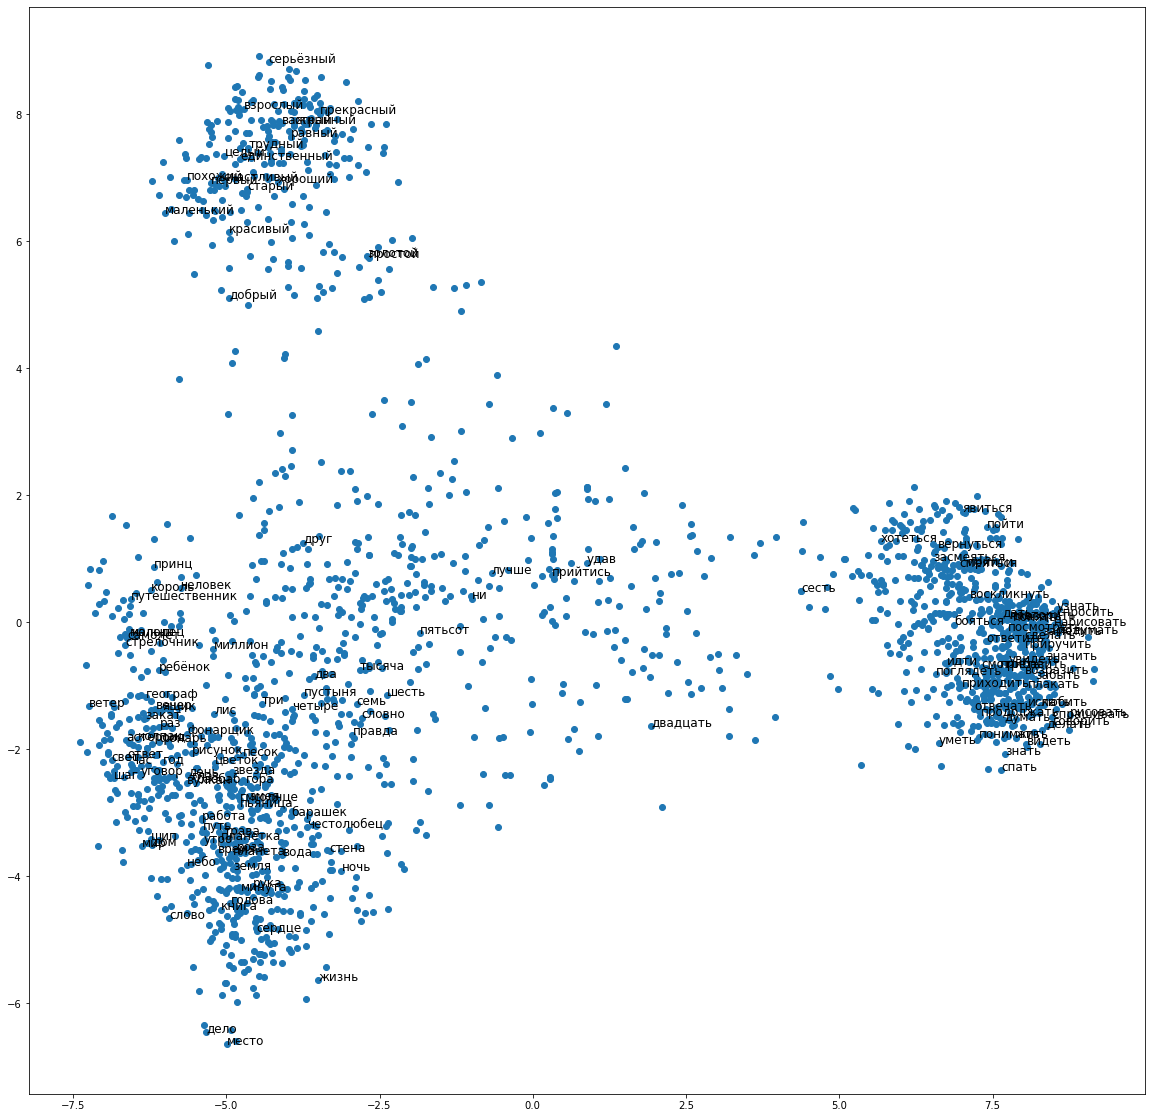

In [26]:
words = df_words['Word'][:150]
plt.figure(figsize=(20,20))
plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1], cmap='viridis')

for word, coord in zip(words, word_vecs_2d):
    x, y = coord
    plt.text(x, y, word, size=12)

plt.show()

### Вывод
Отлично видно, что слова сосредоточены группами. Например, принц/король/человек/путешественник , глаголы отдельное группой сосредоточены, прилагательные отдельно. 

In [33]:
#Применим TSNE
#df_TSNE = TSNE(n_components=2, init='random').fit_transform(word_vecs_2d)
#df_TSNE = pd.DataFrame(df_TSNE, index=df_vect.columns)


In [35]:
vectorizer = TfidfVectorizer()

In [36]:
X = vectorizer.fit_transform(count_words)

In [37]:
print(X.shape)

(2015, 2009)


In [38]:
k_inertia = []
ks = range(1,20)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X)
    k_inertia.append(clf_kmeans.inertia_)

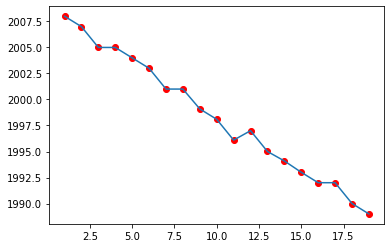

In [39]:
plt.plot(ks, k_inertia, 'ro')
plt.plot(ks, k_inertia);

In [40]:
diff = np.diff(k_inertia)

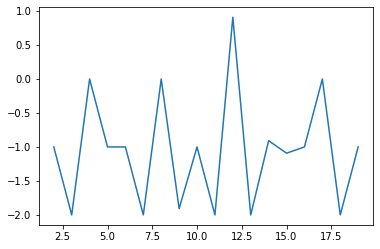

In [41]:
plt.plot(ks[1:], diff)

In [42]:
diff_r = diff[1:] / diff[:-1]

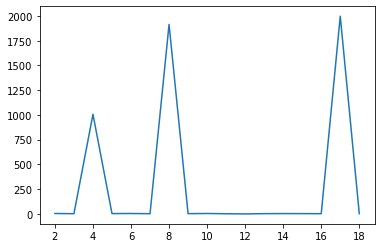

In [43]:
plt.plot(ks[1:-1], diff_r);

In [44]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

12

Всё время меняются значения количество кластеров

In [48]:
number_of_clusters = 12

model = KMeans(n_clusters=number_of_clusters, 
               init='k-means++', 
               max_iter=100, 
               n_init=10)  

model.fit(X)

KMeans(max_iter=100, n_clusters=12)

In [49]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

In [50]:
for i in range(number_of_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Cluster 0:
 невыносимый
 ёлка
 лентяй
 курами
 куры
 куст
 кустик
 куча
 ладоши
 лап
Cluster 1:
 отличаться
 ёлка
 леон
 курами
 куры
 куст
 кустик
 куча
 ладоши
 лап
Cluster 2:
 обидчива
 ёлка
 лентяй
 курами
 куры
 куст
 кустик
 куча
 ладоши
 лап
Cluster 3:
 об
 лепестки
 куры
 куст
 кустик
 куча
 ладоши
 лап
 ласковый
 лгать
Cluster 4:
 вред
 ёлка
 лепестки
 куст
 кустик
 куча
 ладоши
 лап
 ласковый
 лгать
Cluster 5:
 сокровище
 ёлка
 лентяй
 курами
 куры
 куст
 кустик
 куча
 ладоши
 лап
Cluster 6:
 право
 ёлка
 лепестки
 куст
 кустик
 куча
 ладоши
 лап
 ласковый
 лгать
Cluster 7:
 колебаться
 ёлка
 леон
 курами
 куры
 куст
 кустик
 куча
 ладоши
 лап
Cluster 8:
 покупать
 ёлка
 леон
 куры
 куст
 кустик
 куча
 ладоши
 лап
 ласковый
Cluster 9:
 антуан
 ёлка
 купить
 курами
 куры
 куст
 кустик
 куча
 ладоши
 лап
Cluster 10:
 владею
 ёлка
 леон
 куры
 куст
 кустик
 куча
 ладоши
 лап
 ласковый
Cluster 11:
 удачно
 лепестки
 куры
 куст
 кустик
 куча
 ладоши
 лап
 ласковый
 лгать


### Вывод
Слова компануются группами по смыслу, например кура/куры, куст/кустик/куча, лап/ладоши, но одни и те же слова повторяются в разных кластах. Если не требовать определенное количество слов вывести в каждой группе, то все в один класт выводит. Видимо, кластеризация слов в тексте возможна только при помощи специальных библиотек, типа natasha. 

In [51]:

#Применим TSNE
df_TSNE = TSNE(n_components=2, init='random').fit_transform(word_vecs_2d)
df_TSNE = pd.DataFrame(df_TSNE, index=df_vect.columns)

In [77]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics.cluster import v_measure_score

print('𝐾means кластеризация ')
preds = model.predict(X.toarray())
print(f"Silhouette score {silhouette_score(X.toarray(), preds)} ") 
#v_measure_km =  v_measure_score(X.toarray(), preds)
#print("v_measure score {}".format(v_measure_km))

𝐾means кластеризация 
Silhouette score 0.001870341641096828 


In [88]:
from sklearn.cluster import AgglomerativeClustering

print('Agglomerative Clustering')
model_agl = AgglomerativeClustering(n_clusters=10).fit(X.toarray())
print(f"Silhouette score {silhouette_score(X.toarray(),model_agl.labels_ )} ") 
#v_measure_km =  v_measure_score(X.toarray(),model_agl.labels_)
#print("v_measure score {}".format(v_measure_km))

Agglomerative Clustering
Silhouette score 0.002258005207208957 


### Вывод:
Метрики очень плохие в двух случаях

Слова компануются группами по смыслу, например кура/куры, куст/кустик/куча, лап/ладоши, но одни и те же слова повторяются в разных кластах. Если не требовать определенное количество слов вывести в каждой группе, то все не делилось на класты . Видимо, кластеризация слов в тексте возможна только при помощи специальных библиотек, типа natasha.
v_measure почему-то не получился